In [14]:
import pandas as pd
import numpy as np
import tweepy
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pranjubindu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
def change_text(a):
    a=str(a)
    text=re.sub('[^a-zA-Z]',' ',a)
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemmatizer=WordNetLemmatizer()
    text=[lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]
    text=' '.join(text)
    return text

In [16]:
df= pd.read_csv('Twitter_Data.csv',encoding='latin-1')
print(df.head())

                                               tweet  label
0  when modi promised âminimum government maxim...   -1.0
1  talk all the nonsense and continue all the dra...    0.0
2  what did just say vote for modi  welcome bjp t...    1.0
3  asking his supporters prefix chowkidar their n...    1.0
4  answer who among these the most powerful world...    1.0


In [17]:
df.isnull().sum()

tweet    4
label    7
dtype: int64

In [18]:
df['tweet']=df['tweet'].apply(change_text)
df.head()

,tweet,label
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporter prefix chowkidar name modi gr...,1.0
4,answer among powerful world leader today trump...,1.0


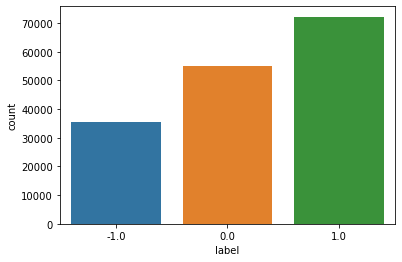

In [19]:
#df['label']
df['label'].value_counts()
sns.countplot('label',data=df)

In [20]:
df = df.dropna()
cf=CountVectorizer()
X1=cf.fit_transform(df['tweet'].values.astype('U'))
y=df['label']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(114081, 95536)
(114081,)
(48892,)
(48892, 95536)


In [22]:
nb=MultinomialNB()

In [23]:
nb.fit(x_train,y_train)

MultinomialNB()

In [24]:
prediction=nb.predict(x_test)

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,prediction))
print(accuracy_score(y_test,prediction))

              precision    recall  f1-score   support

        -1.0       0.71      0.58      0.64     10797
         0.0       0.85      0.57      0.68     16430
         1.0       0.66      0.88      0.76     21665

    accuracy                           0.71     48892
   macro avg       0.74      0.68      0.69     48892
weighted avg       0.73      0.71      0.70     48892

0.7112001963511413


In [26]:
accessToken="1272053768067010562-u4eunjqdSTtiE68q2J0x2NceCY4Jwx"
accessTokenSecret="8FZbdPVlqW1T5LhL2blrXzJgH9PXcty6wvHW0NFRqiHTR"
consumerKey="F0w2fjOVn4EUAH0MIjhA6lbDY"
consumerKeySecret="Bz5BJwUxx6GlSA7AtENuoXPAfV16UkMTSBngquicAh9PyEuBAX"

In [27]:
auth=tweepy.OAuthHandler(consumerKey,consumerKeySecret)
auth.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(auth)

In [28]:
def cleanText(text):
    text=re.sub('https?://[^\s]+','URL',text)
    text=re.sub('@[^\s]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]','',text)
    text=re.sub('\n',"",text)
    return text

In [29]:
numOfTweets= int(input('How many tweets to analyze'))
searchWord=input("Topic:")
date_since="2020-03-10"
tweets=tweepy.Cursor(api.search, q=searchWord, lang='en',since=date_since,tweet_mode="extended").items(numOfTweets)

How many tweets to analyze20
Topic:exams


In [30]:
df_user_tweets=pd.DataFrame([tweet.full_text for tweet in tweets],columns=['Tweets'])
df_user_tweets['Tweets']=df_user_tweets['Tweets'].apply(cleanText)
#df['Polarity']=df['Tweets'].apply(getPolarity)
#df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
#df['Analysis']=df['Polarity'].apply(getAnalysis)
print(df_user_tweets)

                                               Tweets
0    In my 12th exams, I got 24 marks in Chemistry...
1   We are feeling triumphant Man dancing💃🏻, jubil...
2    This is so unfair that only medical student a...
3    The department of Higher Education has heard ...
4    In my 12th exams, I got 24 marks in Chemistry...
5     Its injustice some students passed without e...
6    It's Injustice some students passed without e...
7    loadshedding during a global pandemic in the ...
8    In my 12th exams, I got 24 marks in Chemistry...
9    Congratulations to you too... DAMN Bro!!! Sid...
10   This is so unfair that only medical student a...
11   Congratulations Chhote!!!  for scoring 90.2% ...
12   No compartment exams For just 4 marks got com...
13   Kailahun School Leaders learning how to repor...
14    Studies are showing that 30% of pediatric pa...
15   Promote Medical Students Too .We’re not again...
16   Hui: During middle school exams, on the first...
17   This is so unfair that 

In [31]:
def predict(message):
    if(nb.predict(cf.transform([change_text(message)]))==1):
        return 'Positive'
    elif(nb.predict(cf.transform([change_text(message)]))==0):
        return 'Neutral'
    else:
        return 'Negavite'

In [32]:
df_user_tweets['Analysis']=df_user_tweets['Tweets'].apply(predict)

In [33]:
df_user_tweets.head(20)

,Tweets,Analysis
0,"In my 12th exams, I got 24 marks in Chemistry...",Positive
1,"We are feeling triumphant Man dancing💃🏻, jubil...",Positive
2,This is so unfair that only medical student a...,Positive
3,The department of Higher Education has heard ...,Positive
4,"In my 12th exams, I got 24 marks in Chemistry...",Positive
5,Its injustice some students passed without e...,Neutral
6,It's Injustice some students passed without e...,Neutral
7,loadshedding during a global pandemic in the ...,Negavite
8,"In my 12th exams, I got 24 marks in Chemistry...",Positive
9,Congratulations to you too... DAMN Bro!!! Sid...,Positive
